In [3]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from collections import defaultdict
#this way we can visualize in the notebook
%matplotlib inline 

get_ipython().run_line_magic('matplotlib', 'inline')

# Premier Legue

In [101]:
events_premier = pd.read_json("C:/Users/Luca/Desktop/-/Università/Magistrale/Primo anno/Primo semestre/ADM/Homeworks/Homework #2/Data/events/events_England.json")
matches_premier = pd.read_json("C:/Users/Luca/Desktop/-/Università/Magistrale/Primo anno/Primo semestre/ADM/Homeworks/Homework #2/Data/matches/matches_England.json")
teams = pd.read_json("C:/Users/Luca/Desktop/-/Università/Magistrale/Primo anno/Primo semestre/ADM/Homeworks/Homework #2/Data/teams.json")
players = pd.read_json("C:/Users/Luca/Desktop/-/Università/Magistrale/Primo anno/Primo semestre/ADM/Homeworks/Homework #2/Data/players.json")

# La Liga 

In [77]:
events_liga = pd.read_json("C:/Users/Luca/Desktop/-/Università/Magistrale/Primo anno/Primo semestre/ADM/Homeworks/Homework #2/Data/events/Secondary/events_Spain.json")
matches_liga = pd.read_json("C:/Users/Luca/Desktop/-/Università/Magistrale/Primo anno/Primo semestre/ADM/Homeworks/Homework #2/Data/matches/Secondary/matches_Spain.json")

# Serie A

In [78]:
events_it = pd.read_json("C:/Users/Luca/Desktop/-/Università/Magistrale/Primo anno/Primo semestre/ADM/Homeworks/Homework #2/Data/events/Secondary/events_Italy.json")
matches_it = pd.read_json("C:/Users/Luca/Desktop/-/Università/Magistrale/Primo anno/Primo semestre/ADM/Homeworks/Homework #2/Data/matches/Secondary/matches_Italy.json")

## RQ1

### This section deals with Premier Legue teams

In [38]:
def func(x):
    for value in x.values():
        if value == "England":
            return True
        else:
            return False
        
english_teams = teams[teams["area"].apply(func)]
english_teams = english_teams[["wyId","name"]]
matches_premier       = matches_premier[["gameweek","teamsData","winner"]]
teamID = []

In [39]:
# We selected all the teams that are part of the Premier Legue
english_teams

,wyId,name
0,1613,Newcastle United
8,1673,Huddersfield Town
26,1659,AFC Bournemouth
27,1651,Brighton & Hove Albion
39,1646,Burnley
54,1631,Leicester City
55,1633,West Ham United
56,1639,Stoke City
60,1644,Watford
65,1623,Everton


In [40]:
for i in range(len(matches_premier)):
    for key in matches_premier["teamsData"][i].keys():
        teamID.append(key)
teamID = list(map(int,teamID))        
chunksID = [teamID[x:x+2] for x in range(0, len(teamID),2)]        
matches_premier = matches_premier.drop('teamsData', axis = 1)

In [41]:
matches_premier["Home"] = [chunksID[i][0] for i in matches_premier.index]
matches_premier["Away"] = [chunksID[i][1] for i in matches_premier.index]
matches_premier = matches_premier[['gameweek','Home', 'Away',"winner"]]

In [42]:
teamscore = defaultdict(lambda: [0 for i in range(38)])

In [43]:
winners = matches_premier[matches_premier["winner"] > 0]
ties     = matches_premier[matches_premier["winner"] == 0]

In [11]:
english_teams.set_index("wyId",inplace=True)

In [13]:
for match in matches_premier.index:
    if matches_premier["winner"].iloc[match] != 0:
        team = teams.loc[teams['wyId'] == matches_premier["winner"].iloc[match]]["name"].iloc[0]
        teamscore[team][matches_premier["gameweek"].iloc[match] - 1] += 3

    else: 
        team = teams.loc[teams['wyId'] == matches_premier["Home"].iloc[match]]["name"].iloc[0]
        teamscore[team][matches_premier["gameweek"].iloc[match] - 1] += 1

        team = teams.loc[teams['wyId'] == matches_premier["Away"].iloc[match]]["name"].iloc[0]
        teamscore[team][matches_premier["gameweek"].iloc[match] - 1] += 1

In [14]:
for team in teamscore:
    for i in range(1, len(teamscore[team])):
        teamscore[team][i] += teamscore[team][i - 1]

In [17]:
total = pd.DataFrame(teamscore, index=["{}".format(x) for x in range(1, 39)])
# total

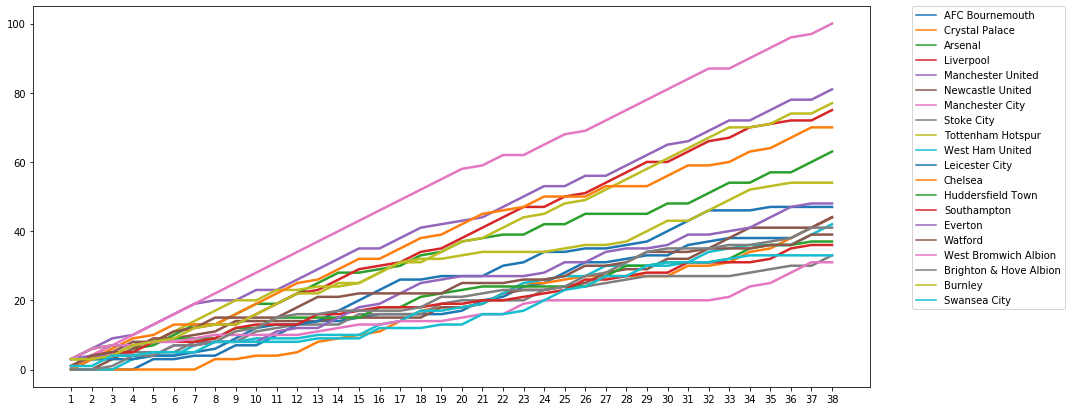

In [69]:
plt.figure(figsize=(15,7))
premier = sns.lineplot(data = total, palette="tab10", linewidth=2.5, dashes=False, sort=False)
premier_legend = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #plot the legend outside


### Part 2. Premier Legue

In [58]:
teamscore1_premier = defaultdict(lambda: [0 for i in range(38)])
windic     = defaultdict(lambda: [])
lostdic    = defaultdict(lambda: [])

In [59]:
for match in matches_premier.index:
    
    if matches_premier["winner"].iloc[match] != 0:
        team = teams.loc[teams['wyId'] == matches_premier["winner"].iloc[match]]["name"].iloc[0]
        teamscore1_premier[team][matches_premier["gameweek"].iloc[match] - 1] = 3

    else: 
        team = teams.loc[teams['wyId'] == matches_premier["Home"].iloc[match]]["name"].iloc[0]
        teamscore1_premier[team][matches_premier["gameweek"].iloc[match] - 1] = 1

        team = teams.loc[teams['wyId'] == matches_premier["Away"].iloc[match]]["name"].iloc[0]
        teamscore1_premier[team][matches_premier["gameweek"].iloc[match] - 1] = 1

In [68]:
def score(res):
    if res == "win":
        point = 3
    elif res == "lost":
        point = 0  
    for k,v in teamscore1_premier.items():
        sum = 0
        for _ in range(38):
            try:
                if v[_] == point and v[_+1] == point:
                    sum +=1
                else:
                    if res == "win":
                        windic[k].append(sum) 
                        sum =0
                    else:
                        lostdic[k].append(sum)
                        sum = 0
            except:
                pass
    if res == "win":
        for k,v in windic.items():
            buff = max(v)
            windic[k] = buff
    else:
        for k,v in lostdic.items():
            buff = max(v)
            lostdic[k] = buff

In [69]:
score("win")
score("lost")

In [70]:
win  = []
lost = []

In [71]:
for w in sorted(windic, key=windic.get, reverse=True):
        win.append(w)
for w in sorted(lostdic, key=lostdic.get, reverse=True):
        lost.append(w) 

In [73]:
for _ in range(3):
    print(lost[_])

West Bromwich Albion
Crystal Palace
Huddersfield Town


In [74]:
for _ in range(3):
    print(win[_])

Manchester City
Tottenham Hotspur
Liverpool


### This section deals with La Liga teams

In [79]:
def func(x):
    for value in x.values():
        if value == "Spain":
            return True
        else:
            return False
        
sp_teams = teams[teams["area"].apply(func)]
sp_teams = sp_teams[["wyId","name"]]
matches_liga       = matches_liga[["gameweek","teamsData","winner"]]
teamID = []

In [80]:
for i in range(len(matches_liga)):
    for key in matches_liga["teamsData"][i].keys():
        teamID.append(key)
teamID = list(map(int,teamID))        
chunksID = [teamID[x:x+2] for x in range(0, len(teamID),2)]        
matches_liga = matches_liga.drop('teamsData', axis = 1)


matches_liga["Home"] = [chunksID[i][0] for i in matches_liga.index]
matches_liga["Away"] = [chunksID[i][1] for i in matches_liga.index]
matches_liga = matches_liga[['gameweek','Home', 'Away',"winner"]]


team_sp_score = defaultdict(lambda: [0 for i in range(38)])


winners = matches_liga[matches_liga["winner"] > 0]
ties     = matches_liga[matches_liga["winner"] == 0]


sp_teams.set_index("wyId",inplace=True)


for match in matches_liga.index:
    if matches_liga["winner"].iloc[match] != 0:
        team_sp_ = teams.loc[teams['wyId'] == matches_liga["winner"].iloc[match]]["name"].iloc[0]
        team_sp_score[team_sp_][matches_liga["gameweek"].iloc[match] - 1] += 3

    else: 
        team_sp_ = teams.loc[teams['wyId'] == matches_liga["Home"].iloc[match]]["name"].iloc[0]
        team_sp_score[team_sp_][matches_liga["gameweek"].iloc[match] - 1] += 1

        team_sp_ = teams.loc[teams['wyId'] == matches_liga["Away"].iloc[match]]["name"].iloc[0]
        team_sp_score[team_sp_][matches_liga["gameweek"].iloc[match] - 1] += 1



for team_sp_ in team_sp_score:
    for i in range(1, len(team_sp_score[team_sp_])):
        team_sp_score[team_sp_][i] += team_sp_score[team_sp_][i - 1]




total_spain = pd.DataFrame(team_sp_score, index=["{}".format(x) for x in range(1, 39)])

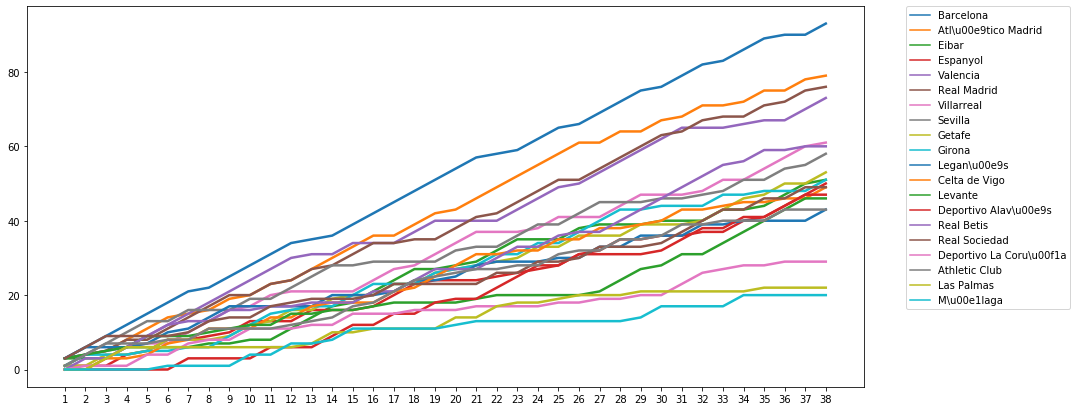

In [81]:
plt.figure(figsize=(15,7))
liga = sns.lineplot(data = total_spain, palette="tab10", linewidth=2.5, dashes=False, sort=False)
liga_legend = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #plot the legend outside

### Part 2. La Liga

In [82]:
teamscore1_liga = defaultdict(lambda: [0 for i in range(38)])
windic_liga     = defaultdict(lambda: [])
lostdic_liga    = defaultdict(lambda: [])

for match in matches_liga.index:
    if matches_liga["winner"].iloc[match] != 0:
        team = teams.loc[teams['wyId'] == matches_liga["winner"].iloc[match]]["name"].iloc[0]
        teamscore1_liga[team][matches_liga["gameweek"].iloc[match] - 1] = 3

    else: 
        team = teams.loc[teams['wyId'] == matches_liga["Home"].iloc[match]]["name"].iloc[0]
        teamscore1_liga[team][matches_liga["gameweek"].iloc[match] - 1] = 1

        team = teams.loc[teams['wyId'] == matches_liga["Away"].iloc[match]]["name"].iloc[0]
        teamscore1_liga[team][matches_liga["gameweek"].iloc[match] - 1] = 1

In [86]:
def score(res):
    if res == "win":
        point = 3
    elif res == "lost":
        point = 0  
    for k,v in teamscore1_liga.items():
        sum = 0
        for _ in range(38):
            try:
                if v[_] == point and v[_+1] == point:
                    sum +=1
                else:
                    if res == "win":
                        windic_liga[k].append(sum) 
                        sum =0
                    else:
                        lostdic_liga[k].append(sum)
                        sum = 0
            except:
                pass
    if res == "win":
        for k,v in windic_liga.items():
            buff = max(v)
            windic_liga[k] = buff
    else:
        for k,v in lostdic_liga.items():
            buff = max(v)
            lostdic_liga[k] = buff

In [87]:
score("win")
score("lost")

win_liga  = []
lost_liga = []

for w in sorted(windic_liga, key=windic_liga.get, reverse=True):
        win_liga.append(w)
for w in sorted(lostdic_liga, key=lostdic_liga.get, reverse=True):
        lost_liga.append(w) 

In [88]:
for _ in range(3):
    print(lost_liga[_])

Las Palmas
M\u00e1laga
Deportivo Alav\u00e9s


In [89]:
for _ in range(3):
    print(win_liga[_])

Valencia
Barcelona
Atl\u00e9tico Madrid


### This section deals with Serie A's teams

In [90]:
def func(x):
    for value in x.values():
        if value == "Italy":
            return True
        else:
            return False
        
it_teams = teams[teams["area"].apply(func)]
it_teams = it_teams[["wyId","name"]]
matches_it       = matches_it[["gameweek","teamsData","winner"]]
teamID = []

In [91]:
for i in range(len(matches_it )):
    for key in matches_it ["teamsData"][i].keys():
        teamID.append(key)
teamID = list(map(int,teamID))        
chunksID = [teamID[x:x+2] for x in range(0, len(teamID),2)]        
matches_it  = matches_it .drop('teamsData', axis = 1)


matches_it ["Home"] = [chunksID[i][0] for i in matches_it .index]
matches_it ["Away"] = [chunksID[i][1] for i in matches_it .index]
matches_it  = matches_it [['gameweek','Home', 'Away',"winner"]]


team_it_score = defaultdict(lambda: [0 for i in range(38)])


winners = matches_it [matches_it ["winner"] > 0]
ties     = matches_it [matches_it ["winner"] == 0]


it_teams.set_index("wyId",inplace=True)


for match in matches_it .index:
    if matches_it ["winner"].iloc[match] != 0:
        team_it_ = teams.loc[teams['wyId'] == matches_it ["winner"].iloc[match]]["name"].iloc[0]
        team_it_score[team_it_][matches_it ["gameweek"].iloc[match] - 1] += 3

    else: 
        team_it_ = teams.loc[teams['wyId'] == matches_it ["Home"].iloc[match]]["name"].iloc[0]
        team_it_score[team_it_][matches_it ["gameweek"].iloc[match] - 1] += 1

        team_it_ = teams.loc[teams['wyId'] == matches_it ["Away"].iloc[match]]["name"].iloc[0]
        team_it_score[team_it_][matches_it ["gameweek"].iloc[match] - 1] += 1



for team_it_ in team_it_score:
    for i in range(1, len(team_it_score[team_it_])):
        team_it_score[team_it_][i] += team_it_score[team_it_][i - 1]




total_italy = pd.DataFrame(team_it_score, index=["{}".format(x) for x in range(1, 39)])

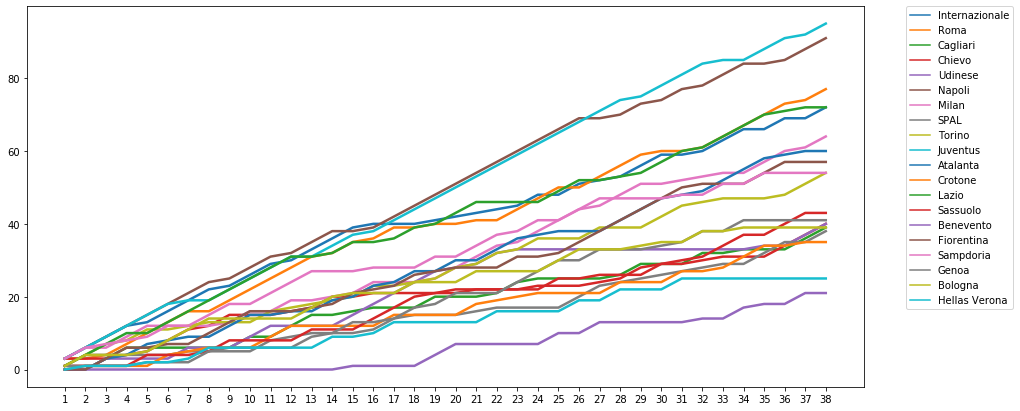

In [92]:
plt.figure(figsize=(15,7))
liga = sns.lineplot(data = total_italy, palette="tab10", linewidth=2.5, dashes=False, sort=False)
liga_legend = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #plot the legend outside

### Part 2. Serie A

In [93]:
teamscore1_it = defaultdict(lambda: [0 for i in range(38)])
windic_it     = defaultdict(lambda: [])
lostdic_it    = defaultdict(lambda: [])

for match in matches_it.index:
    if matches_it["winner"].iloc[match] != 0:
        team = teams.loc[teams['wyId'] == matches_it["winner"].iloc[match]]["name"].iloc[0]
        teamscore1_it[team][matches_it["gameweek"].iloc[match] - 1] = 3

    else: 
        team = teams.loc[teams['wyId'] == matches_it["Home"].iloc[match]]["name"].iloc[0]
        teamscore1_it[team][matches_it["gameweek"].iloc[match] - 1] = 1

        team = teams.loc[teams['wyId'] == matches_it["Away"].iloc[match]]["name"].iloc[0]
        teamscore1_it[team][matches_it["gameweek"].iloc[match] - 1] = 1


In [94]:
def score(res):
    if res == "win":
        point = 3
    elif res == "lost":
        point = 0  
    for k,v in teamscore1_it.items():
        sum = 0
        for _ in range(38):
            try:
                if v[_] == point and v[_+1] == point:
                    sum +=1
                else:
                    if res == "win":
                        windic_it[k].append(sum) 
                        sum =0
                    else:
                        lostdic_it[k].append(sum)
                        sum = 0
            except:
                pass
    if res == "win":
        for k,v in windic_it.items():
            buff = max(v)
            windic_it[k] = buff
    else:
        for k,v in lostdic_it.items():
            buff = max(v)
            lostdic_it[k] = buff


In [95]:
score("win")
score("lost")

win_it  = []
lost_it = []

for w in sorted(windic_it, key=windic_it.get, reverse=True):
        win_it.append(w)
for w in sorted(lostdic_it, key=lostdic_it.get, reverse=True):
        lost_it.append(w) 

In [96]:
for _ in range(3):
    print(lost_it[_])


Benevento
Udinese
Cagliari


In [97]:
for _ in range(3):
    print(win_it[_])


Juventus
Napoli
Lazio


# ----------------------------------------------------------------------------------------------

## RQ3

### Premier Legue RQ3

In [99]:
from datetime import datetime,date

In [8]:
coaches = pd.read_json("C:/Users/Luca/Desktop/-/Università/Magistrale/Primo anno/Primo semestre/ADM/Homeworks/Homework #2/Data/coaches.json")

In [9]:
coaches.set_index("wyId", inplace=True)
coaches_premier = coaches[["shortName","birthDate"]]

teams_dic = dict(teams["area"])

for _ in teams.index:
    if not teams_dic[_]["id"] == "0":
        teams = teams.drop(_)

teams = teams[["officialName","wyId"]]
matches_premier = matches_premier[["gameweek","teamsData"]]
matches_premier = matches_premier.sort_values("gameweek")
teams_coaches_dic = defaultdict(lambda:[])

flat = dict(matches_premier["teamsData"])

####  In this part we use a get() function to get the teamId and coachId of every team. then we add key=teamId and value=coachId to defaultdic, of course we'll filter duplicates in this place


In [10]:
for i in matches_premier.index:
    home, away = list(flat.get(i).keys())[0],list(flat.get(i).keys())[1]
    coachH = flat.get(i).get(home).get("coachId")
    coachA = flat.get(i).get(away).get("coachId")
    if coachA == 0 or coachH == 0:
        continue
    if not coachH in [x for v in teams_coaches_dic.values() for x in v]:
        teams_coaches_dic[home].append(coachH)
    if not coachA in [x for v in teams_coaches_dic.values() for x in v]:
        teams_coaches_dic[away].append(coachA)  

#### Now lets calculate the Age for all the coaches

In [11]:
teams_coaches_age = defaultdict(lambda:[])

coaches_premier["Age"] = ""

for _ in coaches_premier.index:
    try:
        coaches_premier["Age"][_] = pd.to_datetime("today").year-pd.to_datetime(coaches_premier["birthDate"][_]).year
    except:
        pass


coaches_premier.drop("birthDate",axis=1,inplace=True)


for k,v in teams_coaches_dic.items():
    for _ in range(len(v)):
        v[_] = list(coaches_premier[coaches_premier.index == v[_]].get("Age"))     


for v in teams_coaches_dic.values():
    for _ in range(len(v)):
        if not v[_]:
            del v[_]      


for k,v in teams_coaches_dic.items():
    teams_coaches_age[k].append(min(v[0])) 

C:\Users\Luca\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Luca\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3325: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Luca\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

#### Implementing DataFrames

In [12]:
ageDF = pd.DataFrame(teams_coaches_age)
ageDF = ageDF.T
ageDF.reset_index(inplace=True)
ageDF.columns = ["teamId","Age"]
ageDF = pd.merge(ageDF.astype(str),teams.astype(str),left_on="teamId",right_on="wyId")
ageDF = ageDF.sort_values("Age")

In [13]:
ageDF[:10]
ageDF

,teamId,Age,officialName,wyId
16,1659,42,AFC Bournemouth,1659
10,1644,42,Watford FC,1644
14,10531,47,Swansea City AFC,10531
5,1624,47,Tottenham Hotspur FC,1624
19,1673,48,Huddersfield Town FC,1673
15,1619,48,Southampton FC,1619
7,1625,48,Manchester City FC,1625
8,1646,48,Burnley FC,1646
18,1628,49,Crystal Palace FC,1628
9,1610,50,Chelsea FC,1610


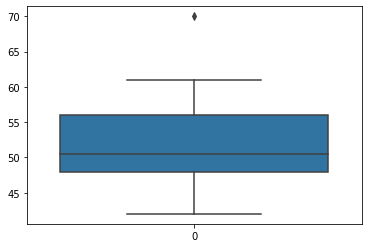

In [14]:
sns.boxplot(data = ageDF["Age"])

### La Liga RQ3

In [106]:
coaches = pd.read_json("C:/Users/Luca/Desktop/-/Università/Magistrale/Primo anno/Primo semestre/ADM/Homeworks/Homework #2/Data/coaches.json")
matches_liga = pd.read_json("C:/Users/Luca/Desktop/-/Università/Magistrale/Primo anno/Primo semestre/ADM/Homeworks/Homework #2/Data/matches/Secondary/matches_Spain.json")
coaches_liga = coaches[["shortName","birthDate"]]
teams = pd.read_json("C:/Users/Luca/Desktop/-/Università/Magistrale/Primo anno/Primo semestre/ADM/Homeworks/Homework #2/Data/teams.json")

teams_dic = dict(teams["area"])

for _ in teams.index:
    if not teams_dic[_]["id"] == "0":
        teams = teams.drop(_)

teams = teams[["officialName","wyId"]]
matches_liga = matches_liga[["gameweek","teamsData"]]
matches_liga = matches_liga.sort_values("gameweek")
teams_coaches_dic = defaultdict(lambda:[])

flat = dict(matches_liga["teamsData"])

In [108]:
for i in matches_liga.index:
    home, away = list(flat.get(i).keys())[0],list(flat.get(i).keys())[1]
    coachH = flat.get(i).get(home).get("coachId")
    coachA = flat.get(i).get(away).get("coachId")
    if coachA == 0 or coachH == 0:
        continue
    if not coachH in [x for v in teams_coaches_dic.values() for x in v]:
        teams_coaches_dic[home].append(coachH)
    if not coachA in [x for v in teams_coaches_dic.values() for x in v]:
        teams_coaches_dic[away].append(coachA)  


In [109]:
teams_coaches_age = defaultdict(lambda:[])

coaches_liga["Age"] = ""

for _ in coaches_liga.index:
    try:
        coaches_liga["Age"][_] = pd.to_datetime("today").year-pd.to_datetime(coaches_liga["birthDate"][_]).year
    except:
        pass


coaches_liga.drop("birthDate",axis=1,inplace=True)


for k,v in teams_coaches_dic.items():
    for _ in range(len(v)):
        v[_] = list(coaches_liga[coaches_liga.index == v[_]].get("Age"))     


for v in teams_coaches_dic.values():
    for _ in range(len(v)):
        if not v[_]:
            del v[_]      


for k,v in teams_coaches_dic.items():
    teams_coaches_age[k].append(min(v[0])) 

C:\Users\Luca\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Luca\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3325: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Luca\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

IndexError: list index out of range

In [ ]:
ageDF_liga = pd.DataFrame(teams_coaches_age)
ageDF_liga = ageDF_liga.T
ageDF_liga.reset_index(inplace=True)
ageDF_liga.columns = ["teamId","Age"]
ageDF_liga = pd.merge(ageDF_liga.astype(str),teams.astype(str),left_on="teamId",right_on="wyId")
ageDF_liga = ageDF_liga.sort_values("Age")

ageDF_liga[:10]
ageDF_liga

In [ ]:
sns.boxplot(data = ageDF_liga["Age"])

### Serie A RQ3

In [ ]:
coaches = pd.read_json("C:/Users/Luca/Desktop/-/Università/Magistrale/Primo anno/Primo semestre/ADM/Homeworks/Homework #2/Data/coaches.json")
matchesit = pd.read_json("C:/Users/Luca/Desktop/-/Università/Magistrale/Primo anno/Primo semestre/ADM/Homeworks/Homework #2/Data/matches/Secondary/matches_Spain.json")
coaches_it = coaches[["shortName","birthDate"]]
teams = pd.read_json("C:/Users/Luca/Desktop/-/Università/Magistrale/Primo anno/Primo semestre/ADM/Homeworks/Homework #2/Data/teams.json")

# -------------------------------------------------------------------------------------------------

## RQ4

### Premier Legue RQ4

In [27]:
# we are only interested in the Passes 
passes = events_premier[events_premier["eventName"] == "Pass"][["id", "matchId", "playerId", "tags", "teamId"]] 

In [28]:
# Merge togheter player and passes (sub-table of events)
newdf4 = passes.merge(players, left_on='playerId', right_on='wyId') 

In [32]:
# we added a new column with the total attempts
newdf4['total_attempts'] = newdf4.groupby('playerId')['playerId'].transform('count') 
newdf4 = newdf4[["playerId", "shortName", "tags", "total_attempts"]]

In [34]:
# add a column that counts every completed pass giving 1 if tag == 1801 and 0 if it is not
newdf4['tag'] = newdf4.apply(lambda row: 1 if row.tags[0]['id'] == 1801 else 0, axis=1)

In [35]:
# adding a column with the winning attempts
newdf4['winning_attempts'] = newdf4.groupby('playerId')['tag'].transform('sum')
newdf4 = newdf4[newdf4 ["total_attempts"] > 380]

In [37]:
# we grouped by playerID and created a new column called Ratio
rq4_pr = newdf4.groupby('playerId',as_index=False).last()
rq4_pr['ratio'] = rq4_pr["winning_attempts"]/rq4_pr["total_attempts"]
rq4_pr[["playerId", "shortName", "total_attempts", "winning_attempts","ratio"]].head(10)

,playerId,shortName,total_attempts,winning_attempts,ratio
0,36,T. Alderweireld,898,762,0.848552
1,48,J. Vertonghen,2370,2013,0.849367
2,54,C. Eriksen,2196,1677,0.763661
3,74,R. Klavan,1130,1017,0.900000
4,93,J. Gu\u00f0munds\u00adson,840,528,0.628571
5,107,E. Pieters,1041,694,0.666667
6,116,G. Wijnaldum,1225,1069,0.872653
7,160,D. Janmaat,822,567,0.689781
8,173,R. van La Parra,690,477,0.691304
9,262,L. Fer,587,460,0.783646


### La Liga RQ4

In [38]:
# ## RQ4
# we are only interested in the Passes 
passes_liga = events_liga[events_liga["eventName"] == "Pass"][["id", "matchId", "playerId", "tags", "teamId"]] 

# Merge togheter player and passes (sub-table of events)
rq4_liga = passes_liga.merge(players, left_on='playerId', right_on='wyId') 

# we added a new column with the total attempts
rq4_liga['total_attempts'] = rq4_liga.groupby('playerId')['playerId'].transform('count') 
rq4_liga = rq4_liga[["playerId", "shortName", "tags", "total_attempts"]]

# add a column that counts every completed pass giving 1 if tag == 1801 and 0 if it is not
rq4_liga['tag'] = rq4_liga.apply(lambda row: 1 if row.tags[0]['id'] == 1801 else 0, axis=1)

# adding a column with the winning attempts
rq4_liga['winning_attempts'] = rq4_liga.groupby('playerId')['tag'].transform('sum')
rq4_liga = rq4_liga[rq4_liga ["total_attempts"] > 380]

# we grouped by playerID and created a new column called Ratio
pas_liga = rq4_liga.groupby('playerId',as_index=False).last()
pas_liga['ratio'] = pas_liga["winning_attempts"]/pas_liga["total_attempts"]
pas_liga[["playerId", "shortName", "total_attempts", "winning_attempts","ratio"]].head(10)

,playerId,shortName,total_attempts,winning_attempts,ratio
0,254,R. Rosales,1475,1020,0.691525
1,3267,Guaita,519,373,0.718690
2,3269,Jordi Alba,2089,1687,0.807563
3,3270,Barrag\u00e1n,1350,1048,0.776296
4,3277,V\u00edctor Ru\u00edz,1333,1101,0.825956
5,3280,\u00c9. Banega,2038,1676,0.822375
6,3282,Canales,1129,883,0.782108
7,3286,Dani Parejo,2153,1770,0.822109
8,3287,Portu,619,394,0.636511
9,3290,Aduriz,426,283,0.664319


### Serie A RQ4

In [39]:
# ## RQ4
# we are only interested in the Passes 
passes_it = events_it[events_it["eventName"] == "Pass"][["id", "matchId", "playerId", "tags", "teamId"]] 

# Merge togheter player and passes (sub-table of events)
rq4_it = passes_it.merge(players, left_on='playerId', right_on='wyId') 

# we added a new column with the total attempts
rq4_it['total_attempts'] = rq4_it.groupby('playerId')['playerId'].transform('count') 
rq4_it = rq4_it[["playerId", "shortName", "tags", "total_attempts"]]

# add a column that counts every completed pass giving 1 if tag == 1801 and 0 if it is not
rq4_it['tag'] = rq4_it.apply(lambda row: 1 if row.tags[0]['id'] == 1801 else 0, axis=1)

# adding a column with the winning attempts
rq4_it['winning_attempts'] = rq4_it.groupby('playerId')['tag'].transform('sum')
rq4_it = rq4_it[rq4_it ["total_attempts"] > 380]

# we grouped by playerID and created a new column called Ratio
pas_it = rq4_it.groupby('playerId',as_index=False).last()
pas_it['ratio'] = pas_it["winning_attempts"]/pas_it["total_attempts"]
pas_it[["playerId", "shortName", "total_attempts", "winning_attempts","ratio"]].head(10)

,playerId,shortName,total_attempts,winning_attempts,ratio
0,114,K. Strootman,1392,1128,0.810345
1,122,D. Mertens,973,662,0.680370
2,130,S. de Vrij,1507,1278,0.848042
3,192,J. Vukovi\u0107,509,392,0.770138
4,394,B. Nuytinck,1177,1001,0.850467
5,625,M. de Roon,1589,1320,0.830711
6,3300,Albiol,2390,2120,0.887029
7,3313,Jos\u00e9 Callej\u00f3n,1476,1116,0.756098
8,3318,S. Khedira,923,777,0.841820
9,3323,G. Higua\u00edn,681,513,0.753304


# -----------------------------------------------------------------------------------------------

## RQ5

### Premier Legue RQ5

In [7]:
#we are only interested in the Duels and then pick the air duels tag 1801
duel = events_premier[events_premier["subEventName"] == "Air duel"][["id", "matchId", "playerId", "tags", "teamId"]] 
#duel 

In [8]:
# it gives us only 34778 records vs 37760 of duel, why? There are players with ID = 0
newdf = duel.merge(players, left_on='playerId', right_on='wyId') 

In [10]:
# we added a new column with the total attempts
newdf['total_attempts'] = newdf.groupby('playerId')['playerId'].transform('count') 
newdf = newdf[["playerId", "tags", "height", "total_attempts"]]

In [11]:
# add a column that counts every winning duel giving 1 if tag == 1801 and 0 if it is not
newdf['tag'] = newdf.apply(lambda row: 1 if row.tags[1]['id'] == 1801 else 0, axis=1)
#newdf

In [12]:
# adding a column with the winning attempts
newdf['winning_attempts'] = newdf.groupby('playerId')['tag'].transform('sum')
newdf = newdf[newdf ["total_attempts"] > 38]

In [13]:
# we grouped by playerID and created a new column called Ratio
temp = newdf.groupby('playerId',as_index=False).last()
temp['ratio'] = temp["winning_attempts"]/temp["total_attempts"]
#temp[["height", "ratio"]]

In [14]:
# we grouped by playerID and created a new column called Ratio
temp = newdf.groupby('playerId',as_index=False).last()
temp['ratio'] = temp["winning_attempts"]/temp["total_attempts"]

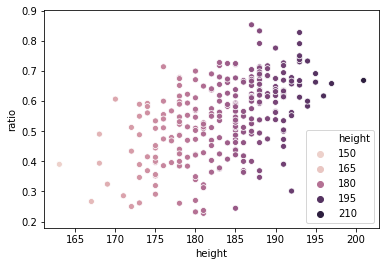

In [15]:
sns.scatterplot(x = temp["height"], y = temp['ratio'], data=temp, hue=temp["height"])

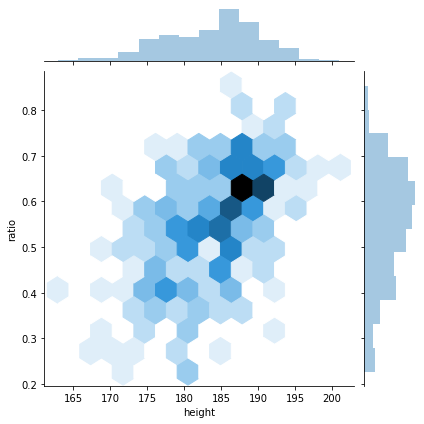

In [17]:
sns.jointplot(x = temp["height"], y = temp['ratio'], data=temp, kind="hex")

### La Liga RQ5

In [20]:

#we are only interested in the Duels and then pick the air duels tag 1801
duel = events_liga[events_liga["subEventName"] == "Air duel"][["id", "matchId", "playerId", "tags", "teamId"]] 

newdf_liga = duel.merge(players, left_on='playerId', right_on='wyId') 

# we added a new column with the total attempts
newdf_liga['total_attempts'] = newdf_liga.groupby('playerId')['playerId'].transform('count') 
newdf_liga = newdf_liga[["playerId", "tags", "height", "total_attempts"]]


# add a column that counts every winning duel giving 1 if tag == 1801 and 0 if it is not
newdf_liga['tag'] = newdf_liga.apply(lambda row: 1 if row.tags[1]['id'] == 1801 else 0, axis=1)
#newdf_liga


# adding a column with the winning attempts
newdf_liga['winning_attempts'] = newdf_liga.groupby('playerId')['tag'].transform('sum')
newdf_liga = newdf_liga[newdf_liga ["total_attempts"] > 38]


# we grouped by playerID and created a new column called Ratio
liga_airduel= newdf_liga.groupby('playerId',as_index=False).last()
liga_airduel['ratio'] = liga_airduel["winning_attempts"]/liga_airduel["total_attempts"]



# we grouped by playerID and created a new column called Ratio
liga_airduel= newdf_liga.groupby('playerId',as_index=False).last()
liga_airduel['ratio'] = liga_airduel["winning_attempts"]/liga_airduel["total_attempts"]




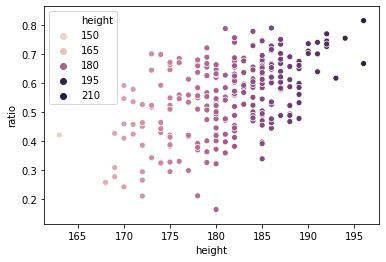

In [21]:
sns.scatterplot(x = liga_airduel["height"], y = liga_airduel['ratio'], data=liga_airduel, hue=liga_airduel["height"])


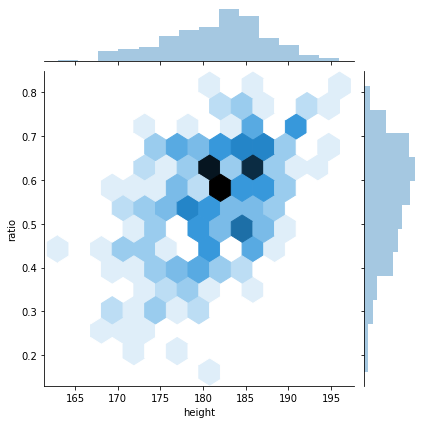

In [22]:
sns.jointplot(x = liga_airduel["height"], y = liga_airduel['ratio'], data=liga_airduel, kind="hex")

### Serie A RQ5

In [24]:

#we are only interested in the Duels and then pick the air duels tag 1801
duel = events_it[events_it["subEventName"] == "Air duel"][["id", "matchId", "playerId", "tags", "teamId"]] 

newdf_it = duel.merge(players, left_on='playerId', right_on='wyId') 

# we added a new column with the total attempts
newdf_it['total_attempts'] = newdf_it.groupby('playerId')['playerId'].transform('count') 
newdf_it = newdf_it[["playerId", "tags", "height", "total_attempts"]]


# add a column that counts every winning duel giving 1 if tag == 1801 and 0 if it is not
newdf_it['tag'] = newdf_it.apply(lambda row: 1 if row.tags[1]['id'] == 1801 else 0, axis=1)
#newdf_it


# adding a column with the winning attempts
newdf_it['winning_attempts'] = newdf_it.groupby('playerId')['tag'].transform('sum')
newdf_it = newdf_it[newdf_it ["total_attempts"] > 38]


# we grouped by playerID and created a new column called Ratio
it_airduel= newdf_it.groupby('playerId',as_index=False).last()
it_airduel['ratio'] = it_airduel["winning_attempts"]/it_airduel["total_attempts"]



# we grouped by playerID and created a new column called Ratio
it_airduel= newdf_it.groupby('playerId',as_index=False).last()
it_airduel['ratio'] = it_airduel["winning_attempts"]/it_airduel["total_attempts"]

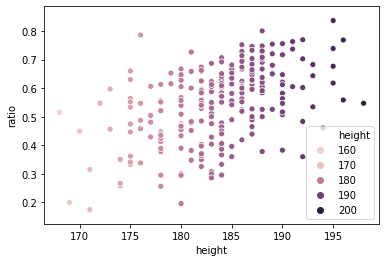

In [25]:
sns.scatterplot(x = it_airduel["height"], y = it_airduel['ratio'], data=it_airduel, hue=it_airduel["height"])

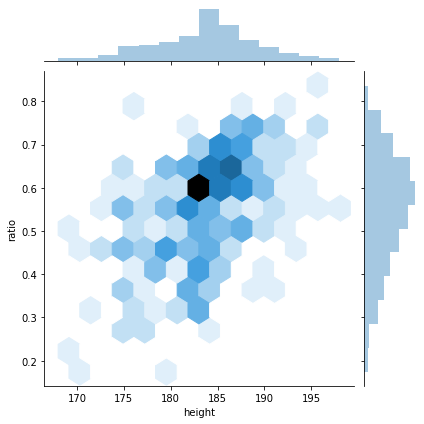

In [26]:
sns.jointplot(x = it_airduel["height"], y = it_airduel['ratio'], data=it_airduel, kind="hex")

# -------------------------------------------------------------------------------------------

## RQ6 We want to get the top scorers for Premier Legue, La Liga and Serie A

#### We need a function to calculate top scorer for every league we pass. so lets go for it.

In [19]:
def top_scorer(dataframe):
    dic = dict(dataframe["teamsData"])
    goalsdic = defaultdict(lambda: [])
    for k,v in dic.items():
        buffer = v
        for team_id,value in buffer.items():
            for i in range(11):
                if buffer.get(team_id).get("formation").get("lineup")[i]["goals"] != "null":
                    player = buffer.get(team_id).get("formation").get("lineup")[i]["playerId"]
                    goals = buffer.get(team_id).get("formation").get("lineup")[i]["goals"]
                    goalsdic[player].append(int(goals))
    for k,v in goalsdic.items():
        goals = sum(v)
        goalsdic[k] = goals
    goalsDF = pd.DataFrame(goalsdic,index=range(1))
    goalsDF = goalsDF.T
    goalsDF = goalsDF.sort_values(0,ascending=False)
    return goalsDF


ENGLAND = top_scorer(matches_premier)
ITALY   = top_scorer(matches_it)
SPAIN = top_scorer(matches_liga) 

#### We need to define a function to clean the table and return a clean data frame.

In [20]:
def merge(name,suffix):
    global players
    playersDF = players[["wyId","shortName","currentTeamId"]]
    final_data = pd.merge(playersDF,name,left_on="wyId",right_index=True)
    global teams
    teams = teams[["wyId","officialName"]]
    final = pd.merge(final_data,teams,left_on="currentTeamId",right_on="wyId")
    final = final[["shortName",0,"officialName"]]
    final.columns = [f"shortName-{suffix}",f"Goals-{suffix}",f"officialName-{suffix}"]
    final.sort_values(f"Goals-{suffix}",ascending=False,inplace=True)
    return final[:12]

In [21]:
E = merge(ENGLAND,"EN")
I = merge(ITALY,"IT")
S= merge(SPAIN,"SPA")
E = E.reset_index()
I = I.reset_index()
S = S.reset_index()

#### Finally we merge things together and remove some columns.

In [22]:
buff = pd.merge(E,I,left_index=True,right_index=True)
final = pd.merge(buff,S,left_index=True,right_index=True)


final = final.drop(["index_x","index_y","index"],axis=1)

In [23]:
final

,shortName-EN,Goals-EN,officialName-EN,shortName-IT,Goals-IT,officialName-IT,shortName-SPA,Goals-SPA,officialName-SPA
0,Mohamed Salah,30,Liverpool FC,M. Icardi,29,FC Internazionale Milano,L. Messi,33,FC Barcelona
1,H. Kane,29,Tottenham Hotspur FC,C. Immobile,29,SS Lazio,Cristiano Ronaldo,26,Juventus FC
2,S. Ag\u00fcero,21,Manchester City FC,P. Dybala,20,Juventus FC,L. Su\u00e1rez,25,FC Barcelona
3,J. Vardy,20,Leicester City FC,F. Quagliarella,19,UC Sampdoria,Iago Aspas,22,Real Club Celta de Vigo
4,R. Sterling,16,Manchester City FC,D. Mertens,18,SSC Napoli,C. Stuani,20,Girona FC
5,Roberto Firmino,15,Liverpool FC,G. Higua\u00edn,16,AC Milan,A. Griezmann,19,Club Atl\u00e9tico de Madrid
6,R. Lukaku,15,Manchester United FC,E. D\u017eeko,15,AS Roma,Maxi G\u00f3mez,17,Real Club Celta de Vigo
7,R. Mahrez,12,Manchester City FC,G. Simeone,13,ACF Fiorentina,Gerard Moreno,16,Reial Club Deportiu Espanyol
8,G. Murray,12,Brighton & Hove Albion FC,K. Lasagna,12,Udinese Calcio,Willian Jos\u00e9,15,Real Sociedad de F\u00fatbol
9,A. Lacazette,12,Arsenal FC,R. Inglese,12,AC Chievo Verona,G. Bale,15,Real Madrid Club de F\u00fatbol


## RQ6 part 2

## In this part we want to get hat tricks 


#### We need a function to calculate hat tricks for every league we pass. so lets go for it.


In [25]:
def hat_trick(dataframe):
    dic = dict(dataframe["teamsData"])
    goalsdic = defaultdict(lambda: [])
    for k,v in dic.items():
        buffer = v
        for team_id,value in buffer.items():
            for i in range(11):
                if buffer.get(team_id).get("formation").get("lineup")[i]["goals"] != "null":
                    player = buffer.get(team_id).get("formation").get("lineup")[i]["playerId"]
                    goals = buffer.get(team_id).get("formation").get("lineup")[i]["goals"]
                    if goals == "3":
                        goalsdic[player].append({"GOALS":int(goals)})    
    for k,v in goalsdic.items():
        goals = len(v)
        goalsdic[k] = goals
    goalsDF = pd.DataFrame(goalsdic,index=range(1))
    goalsDF = goalsDF.T
    goalsDF = goalsDF.sort_values(0,ascending=False)
    return goalsDF


ENGLAND_hat = hat_trick(matches_premier )
ITALY_hat   = hat_trick(matches_it)
SPAIN_hat = hat_trick(matches_liga) 

#### We need to define a function to clean the table and return a clean data frame

In [26]:
def merge(name,suffix):
    global players
    playersDF = players[["wyId","shortName","currentTeamId"]]
    final_data = pd.merge(playersDF,name,left_on="wyId",right_index=True)
    global teams
    teams = teams[["wyId","officialName"]]
    final = pd.merge(final_data,teams,left_on="currentTeamId",right_on="wyId")
    final = final[["shortName",0,"officialName"]]
    final.columns = [f"shortName-{suffix}",f"Goals-{suffix}",f"officialName-{suffix}"]
    final.sort_values(f"Goals-{suffix}",ascending=False,inplace=True)
    return final


E_hat = merge(ENGLAND_hat,"EN")
I_hat = merge(ITALY_hat,"IT")
S_hat = merge(SPAIN_hat,"GER")
E_hat = E_hat.reset_index()
I_hat = I_hat.reset_index()
S_hat = S.reset_index()



#### Finally we merge things together and remove some columns.


In [28]:
buff = pd.merge(E_hat,I_hat,left_index=True,right_index=True)
final = pd.merge(buff,S_hat,left_index=True,right_index=True)


final = final.drop(["index_x","index_y","index", "level_0"],axis=1)


final.drop(["Goals-EN","Goals-IT","Goals-SPA"],axis=1)

,shortName-EN,officialName-EN,shortName-IT,officialName-IT,shortName-SPA,officialName-SPA
0,S. Ag\u00fcero,Manchester City FC,P. Dybala,Juventus FC,L. Messi,FC Barcelona
1,H. Kane,Tottenham Hotspur FC,D. Mertens,SSC Napoli,Cristiano Ronaldo,Juventus FC
2,\u00c1lvaro Morata,Chelsea FC,S. Khedira,Juventus FC,L. Su\u00e1rez,FC Barcelona
3,A. Ramsey,Arsenal FC,G. Higua\u00edn,AC Milan,Iago Aspas,Real Club Celta de Vigo
4,C. Wilson,AFC Bournemouth,G. Simeone,ACF Fiorentina,C. Stuani,Girona FC


# -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## CRQ1

## Part 1. Premier Legue

C:\Users\Luca\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Luca\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


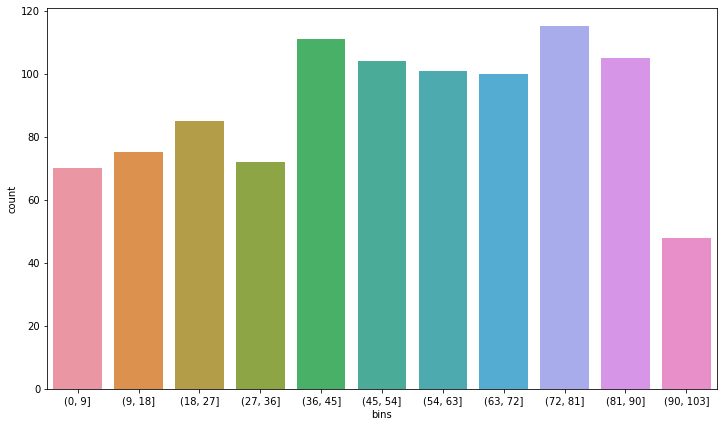

In [61]:
get_ipython().run_line_magic('matplotlib', 'inline')

crq1_1_premier = events_premier[["matchPeriod", "eventSec", "tags", "subEventId", "matchId", "eventName", "teamId", "playerId"]]
# Transform seconds into minutes
crq1_1_premier["eventMin"] = crq1_1_premier.apply(lambda row: row.eventSec/60+45 if row.matchPeriod == "2H" else row.eventSec/60, axis= 1) 

# We decided to put in the bin [36-45) all the goals that were scored at 45+ of the first half of the game
crq1_1_premier.loc[(crq1_1_premier['eventMin']> 45) & (crq1_1_premier["matchPeriod"] == '1H'), ['eventMin']] = 45

# now we have to keep only the events in premier legue with tag 101 = Goal that were succesful tag 1801
# some indexes have an empty tag []
crq1_1_premier['goal'] = crq1_1_premier.apply(lambda row: (1 if (row.tags[0]['id'] == 101) & (row.tags[-1]['id'] == 1801) else 0) if row.tags != [] else 0, axis=1)

# we kept the goals that were scored
crq1_1_premier = crq1_1_premier[crq1_1_premier.goal != 0]

# let's set up the bins 
goals_premier = crq1_1_premier
bins = [0,9,18,27,36,45,54,63,72,81,90,103]

#use pd.cut function can attribute the values into its specific bins
goals_premier["bins"] = pd.cut(crq1_1_premier["eventMin"], bins) 

goals_premier = goals_premier[["bins", "goal"]]

goals_premier.groupby(['bins']).sum() #just to double check

plt.figure(figsize=(12,7))
goal_plot = sns.countplot(x="bins", data=goals_premier)

## Part 2. Premier Legue

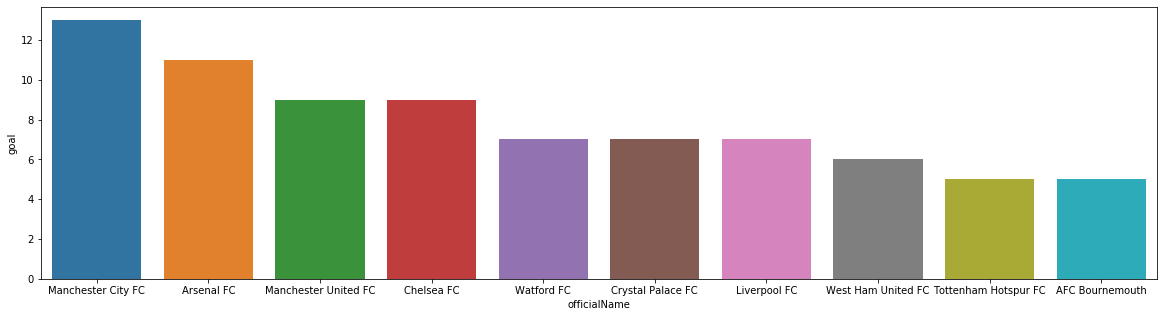

In [51]:
# let's set up the bins 
top10_premier = crq1_1_premier
bins = [81,90]
#use pd.cut function can attribute the values into its specific bins
top10_premier["bins"] = pd.cut(top10_premier["eventMin"], bins) 

top10_premier = crq1_1_premier[["teamId", "bins", "goal"]]
top10_premier = top10_premier.dropna()

top10_premier = top10_premier.groupby(["teamId"]).sum() # we are grouping by teamId

top10_premier = top10_premier.sort_values("goal", ascending=False).head(10)

# now we are going to merge the teamsID between top10_premier and teams to ge the name 
top10_premier_name = top10_premier.merge(teams, left_on='teamId', right_on='wyId') 

top10_premier_name = top10_premier_name[["goal", "officialName"]]
top10_premier_name

plt.figure(figsize=(20,5))
ax = sns.barplot(x="officialName", y="goal", data=top10_premier_name)

## Part 3. Premier Legue

In [58]:
df1_crq = crq1_1_premier

# let's set up the bins 
goals_scored_premier = crq1_1_premier
bins = [0,9,18,27,36,45,54,63,72,81,90,103]
#use pd.cut function can place the values into its specific bins
goals_scored_premier["bins"] = pd.cut(df1_crq["eventMin"], bins) 

goals_scored_premier = goals_scored_premier[["playerId", "bins", "eventMin"]]

df = pd.crosstab(index=[goals_scored_premier['bins']],columns=[goals_scored_premier['playerId']],margins=False)

df = df.astype(bool).astype(int)

goal_period_premier = df.sum(axis = 0)

s = goal_period_premier > 8

s = s[s] # we only keep the players that scored at least one goal in each period

player_8_premier = pd.DataFrame({'playerId':s.index})

crq1_3_premier = player_8_premier.merge(players, left_on='playerId', right_on='wyId') 

crq1_3_premier["shortName"]

0    \u00c1lvaro Morata
1             R. Lukaku
2               H. Kane
3           R. Sterling
4              J. Vardy
5         Mohamed Salah
Name: shortName, dtype: object

#  

## Part 1. La Liga

C:\Users\Luca\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Luca\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\Luca\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

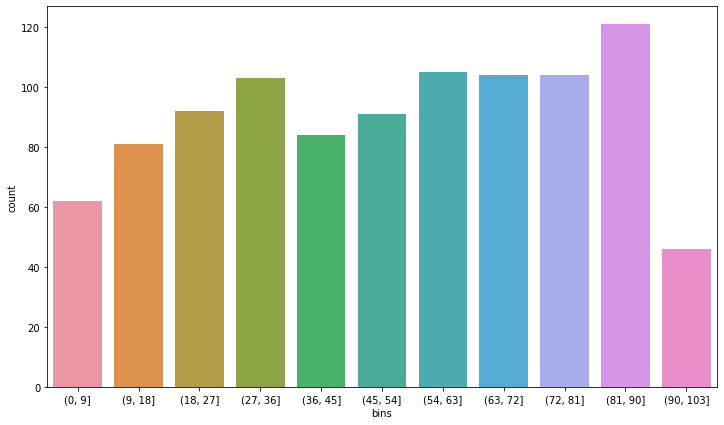

In [60]:
get_ipython().run_line_magic('matplotlib', 'inline')
crq1_1_liga = events_liga[["matchPeriod", "eventSec", "tags", "subEventId", "matchId", "eventName", "teamId", "playerId"]]
# Transform seconds into minutes
crq1_1_liga["eventMin"] = crq1_1_liga.apply(lambda row: row.eventSec/60+45 if row.matchPeriod == "2H" else row.eventSec/60, axis= 1) 

# We decided to put in the bin [36-45) all the goals that were scored at 45+ of the first half of the game
crq1_1_liga.loc[(crq1_1_liga['eventMin']> 45) & (crq1_1_liga["matchPeriod"] == '1H'), ['eventMin']] = 45

# now we have to keep only the events in premier legue with tag 101 = Goal that were succesful tag 1801
# some indexes have an empty tag []
crq1_1_liga['goal'] = crq1_1_liga.apply(lambda row: (1 if (row.tags[0]['id'] == 101) & (row.tags[-1]['id'] == 1801) else 0) if row.tags != [] else 0, axis=1)

# we kept the goals that were scored
crq1_1_liga = crq1_1_liga[crq1_1_liga.goal != 0]

# let's set up the bins 
goals_liga = crq1_1_liga
bins = [0,9,18,27,36,45,54,63,72,81,90,103]

#use pd.cut function can attribute the values into its specific bins
goals_liga["bins"] = pd.cut(crq1_1_liga["eventMin"], bins) 

goals_liga = goals_liga[["bins", "goal"]]

goals_liga.groupby(['bins']).sum() #just to double check

plt.figure(figsize=(12,7))
goal_plot_premier = sns.countplot(x="bins", data=goals_liga)

## Part 2. La Liga

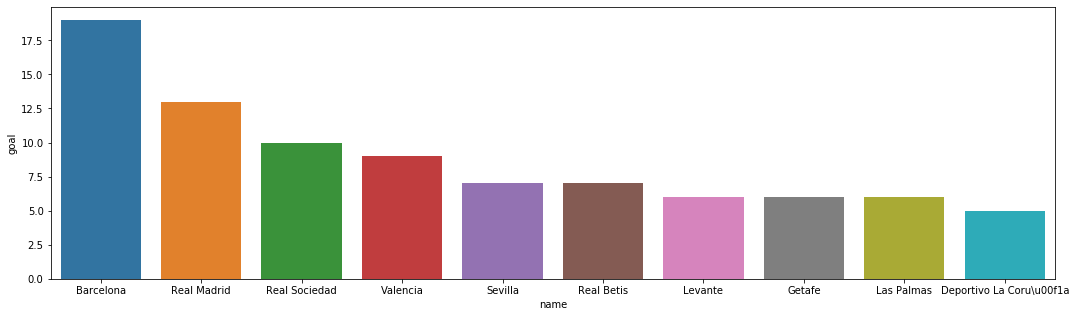

In [68]:
# let's set up the bins 
top10_liga = crq1_1_liga
bins = [81,90]
#use pd.cut function can attribute the values into its specific bins
top10_liga["bins"] = pd.cut(top10_liga["eventMin"], bins) 

top10_liga = crq1_1_liga[["teamId", "bins", "goal"]]
top10_liga = top10_liga.dropna()

top10_liga = top10_liga.groupby(["teamId"]).sum() # we are grouping by teamId

top10_liga = top10_liga.sort_values("goal", ascending=False).head(10)

# now we are going to merge the teamsID between top10_liga and teams to ge the name 
top10_liga_name = top10_liga.merge(teams, left_on='teamId', right_on='wyId') 

top10_liga_name = top10_liga_name[["goal", "name"]]
plt.figure(figsize=(18,5))
ax = sns.barplot(x="name", y="goal", data=top10_liga_name)

## Part 3. La Liga

In [70]:
df1_crq_liga = crq1_1_liga

# let's set up the bins 
goals_scored_liga = crq1_1_liga
bins = [0,9,18,27,36,45,54,63,72,81,90,103]
#use pd.cut function can place the values into its specific bins
goals_scored_liga["bins"] = pd.cut(df1_crq_liga["eventMin"], bins) 

goals_scored_liga = goals_scored_liga[["playerId", "bins", "eventMin"]]

df = pd.crosstab(index=[goals_scored_liga['bins']],columns=[goals_scored_liga['playerId']],margins=False)

df = df.astype(bool).astype(int)

goal_period_liga = df.sum(axis = 0)

s = goal_period_liga > 8

s = s[s] # we only keep the players that scored at least one goal in each period

player_8_liga = pd.DataFrame({'playerId':s.index})

crq1_3_liga = player_8_liga.merge(players, left_on='playerId', right_on='wyId') 

crq1_3_liga["shortName"]

0    Cristiano Ronaldo
1             L. Messi
2         A. Griezmann
3            C. Stuani
4        Gerard Moreno
5       L. Su\u00e1rez
6              G. Bale
7      Mikel Oyarzabal
Name: shortName, dtype: object

#   

## Part 1. Serie A

C:\Users\Luca\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Luca\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\Luca\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



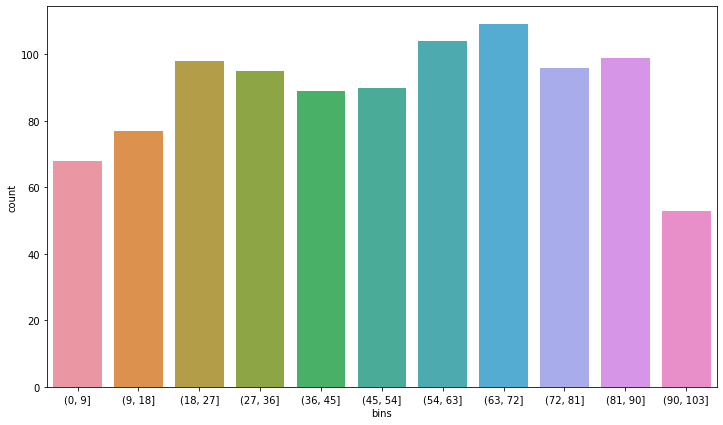

In [62]:
crq1_1_it = events_it[["matchPeriod", "eventSec", "tags", "subEventId", "matchId", "eventName", "teamId", "playerId"]]
# Transform seconds into minutes
crq1_1_it["eventMin"] = crq1_1_it.apply(lambda row: row.eventSec/60+45 if row.matchPeriod == "2H" else row.eventSec/60, axis= 1) 

# We decided to put in the bin [36-45) all the goals that were scored at 45+ of the first half of the game
crq1_1_it.loc[(crq1_1_it['eventMin']> 45) & (crq1_1_it["matchPeriod"] == '1H'), ['eventMin']] = 45

# now we have to keep only the events in premier legue with tag 101 = Goal that were succesful tag 1801
# some indexes have an empty tag []
crq1_1_it['goal'] = crq1_1_it.apply(lambda row: (1 if (row.tags[0]['id'] == 101) & (row.tags[-1]['id'] == 1801) else 0) if row.tags != [] else 0, axis=1)

# we kept the goals that were scored
crq1_1_it = crq1_1_it[crq1_1_it.goal != 0]

# let's set up the bins 
goals_it = crq1_1_it
bins = [0,9,18,27,36,45,54,63,72,81,90,103]

#use pd.cut function can attribute the values into its specific bins
goals_it["bins"] = pd.cut(crq1_1_it["eventMin"], bins) 

goals_it = goals_it[["bins", "goal"]]

goals_it.groupby(['bins']).sum() #just to double check

plt.figure(figsize=(12,7))
goal_plot_ita = sns.countplot(x="bins", data=goals_it)

## Part 2. Serie A

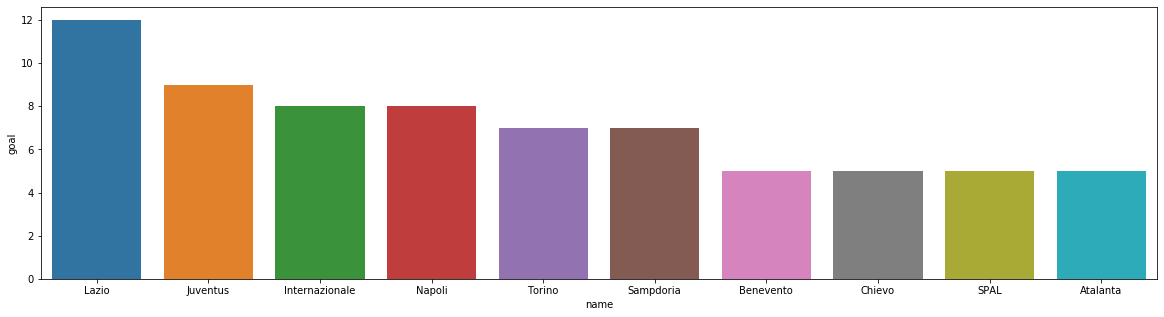

In [69]:
# let's set up the bins 
top10_it = crq1_1_it
bins = [81,90]
#use pd.cut function can attribute the values into its specific bins
top10_it["bins"] = pd.cut(top10_it["eventMin"], bins) 

top10_it = crq1_1_it[["teamId", "bins", "goal"]]
top10_it = top10_it.dropna()

top10_it = top10_it.groupby(["teamId"]).sum() # we are grouping by teamId

top10_it = top10_it.sort_values("goal", ascending=False).head(10)

# now we are going to merge the teamsID between top10_it and teams to ge the name 
top10_it_name = top10_it.merge(teams, left_on='teamId', right_on='wyId') 

top10_it_name = top10_it_name[["goal", "name"]]
plt.figure(figsize=(20,5))
ax = sns.barplot(x="name", y="goal", data=top10_it_name)

## Part 3. Serie A

In [73]:
df1_crq_ita = crq1_1_it

# let's set up the bins 
goals_scored_ita = crq1_1_it
bins = [0,9,18,27,36,45,54,63,72,81,90,103]
#use pd.cut function can place the values into its specific bins
goals_scored_ita["bins"] = pd.cut(df1_crq_ita["eventMin"], bins) 

goals_scored_ita = goals_scored_ita[["playerId", "bins", "eventMin"]]

df = pd.crosstab(index=[goals_scored_ita['bins']],columns=[goals_scored_ita['playerId']],margins=False)

df = df.astype(bool).astype(int)

goal_period_it = df.sum(axis = 0)

s = goal_period_it > 8

s = s[s] # we only keep the players that scored at least one goal in each period

player_8_it = pd.DataFrame({'playerId':s.index})

crq1_3_it = player_8_it.merge(players, left_on='playerId', right_on='wyId') 

crq1_3_it["shortName"]

0          D. Mertens
1    Iago Falqu\u00e9
2       E. D\u017eeko
3     F. Quagliarella
4         C. Immobile
5           P. Dybala
6           M. Icardi
Name: shortName, dtype: object

## -------------------------------------------------------------------------------------------------------------------------------

## CRQ2

## Part 1

In [76]:
matches = pd.read_json("C:/Users/Luca/Desktop/-/Università/Magistrale/Primo anno/Primo semestre/ADM/Homeworks/Homework #2/Data/matches/Secondary/matches_Spain.json")
matches[matches["label"] == "Barcelona - Real Madrid, 2 - 2"] # matchID = 2565907
# events of Barcelona - Real Madrd, 2-2 on the 6th of May 2018
barc_real = events_liga[events_liga["matchId"] == 2565907] 
# We selected only the events we are interested in, such as: Passes, Shots, Free kicks, and Duels
barc_real = barc_real[(barc_real["eventName"] == "Pass") | (barc_real["eventName"] == "Shot")| (barc_real["eventName"] == "Duel")| (barc_real["eventName"] == "Free Kick")] 
findcr = barc_real.merge(players, left_on='playerId', right_on='wyId') 
findcr.groupby("lastName", as_index=False).last() # at this point we found Messi and CR7

,lastName,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,...,currentTeamId,firstName,foot,height,middleName,passportArea,role,shortName,weight,wyId
0,Alba Ramos,3,Free Kick,2826.055898,249646221,2565907,2H,3269,"[{'y': 0, 'x': 34}, {'y': 16, 'x': 34}]",36,...,676,Jordi,left,170,,"{'name': 'Spain', 'id': '724', 'alpha3code': '...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",Jordi Alba,68,3269
1,Alc\u00e1cer Garc\u00eda,8,Pass,2829.391879,249646224,2565907,2H,3291,"[{'y': 21, 'x': 61}, {'y': 11, 'x': 66}]",85,...,676,Francisco,right,175,,"{'name': 'Spain', 'id': '724', 'alpha3code': '...","{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...",Paco Alc\u00e1cer,71,3291
2,Asensio Willemsen,8,Pass,2967.488736,249646057,2565907,2H,288091,"[{'y': 87, 'x': 85}, {'y': 52, 'x': 94}]",80,...,675,Marco,left,182,,"{'name': 'Netherlands', 'id': '528', 'alpha3co...","{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",Marco Asensio,76,288091
3,Bale,1,Duel,2966.938651,249646058,2565907,2H,8278,"[{'y': 43, 'x': 90}, {'y': 87, 'x': 85}]",13,...,675,Gareth Frank,left,185,,"{'name': 'Wales', 'id': '0', 'alpha3code': 'XW...","{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...",G. Bale,81,8278
4,Benzema,8,Pass,2431.462963,249645901,2565907,2H,3321,"[{'y': 20, 'x': 75}, {'y': 25, 'x': 71}]",85,...,675,Karim,right,185,,"{'name': 'Algeria', 'id': '12', 'alpha3code': ...","{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...",K. Benzema,81,3321
5,Bezzera Maciel J\u00fanior,8,Pass,2928.195344,249646242,2565907,2H,40550,"[{'y': 63, 'x': 76}, {'y': 67, 'x': 77}]",85,...,9174,Jos\u00e9 Paulo,right,182,,"{'name': 'Brazil', 'id': '76', 'alpha3code': '...","{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",Paulinho,71,40550
6,Busquets i Burgos,8,Pass,2921.744489,249646235,2565907,2H,3346,"[{'y': 59, 'x': 27}, {'y': 47, 'x': 39}]",85,...,676,Sergio,right,189,,"{'name': 'Spain', 'id': '724', 'alpha3code': '...","{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",Sergio Busquets,76,3346
7,Cabral Semedo,8,Pass,2918.492270,249646233,2565907,2H,222770,"[{'y': 91, 'x': 23}, {'y': 70, 'x': 29}]",85,...,676,N\u00e9lson,right,177,,"{'name': 'Cape Verde Islands', 'id': '132', 'a...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",N\u00e9lson Semedo,67,222770
8,Casimiro,8,Pass,2930.149706,249646043,2565907,2H,40756,"[{'y': 33, 'x': 23}, {'y': 25, 'x': 34}]",85,...,675,Carlos Henrique,right,185,,"{'name': 'Brazil', 'id': '76', 'alpha3code': '...","{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",Casemiro,84,40756
9,Coutinho Correia,8,Pass,2715.988982,249645481,2565907,1H,3802,"[{'y': 60, 'x': 58}, {'y': 52, 'x': 44}]",85,...,676,Philippe,right,171,,"{'name': 'Brazil', 'id': '76', 'alpha3code': '...","{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...",Philippe Coutinho,68,3802


### Let's create the footbal pitch and the heatmap for Cristiano Ronaldo 


In [80]:
cr = barc_real[barc_real["playerId"] == 3322][["eventName", "playerId", "positions"]] #Cristiano Ronaldo
cr['start_location'] = cr.apply(lambda row: row.positions[0], axis=1)
cr['end_location'] = cr.apply(lambda row: row.positions[1], axis=1)

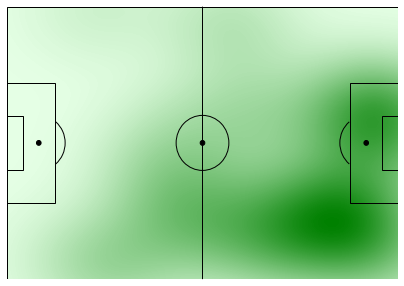

In [81]:
def draw_pitch(ax):
    # focus on only half of the pitch
    #Pitch Outline & Centre Line
    Pitch = patches.Rectangle([0,0], width = 120, height = 80, fill = False)
    #Left, Right Penalty Area and midline
    LeftPenalty = patches.Rectangle([0,22.3], width = 14.6, height = 35.3, fill = False)
    RightPenalty = patches.Rectangle([105.4,22.3], width = 14.6, height = 35.3, fill = False)
    midline = patches.ConnectionPatch([60,0], [60,80], "data", "data")

    #Left, Right 6-yard Box
    LeftSixYard = patches.Rectangle([0,32], width = 4.9, height = 16, fill = False)
    RightSixYard = patches.Rectangle([115.1,32], width = 4.9, height = 16, fill = False)


    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="black", fill = False)
    centreSpot = plt.Circle((60,40),0.71,color="black")
    #Penalty spots and Arcs around penalty boxes
    leftPenSpot = plt.Circle((9.7,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")
    leftArc = patches.Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="black")
    rightArc = patches.Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")
    
    element = [Pitch, LeftPenalty, RightPenalty, midline, LeftSixYard, RightSixYard, centreCircle, 
               centreSpot, rightPenSpot, leftPenSpot, leftArc, rightArc]
    for i in element:
        ax.add_patch(i)

fig=plt.figure() #set up the figures
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax) #overlay our different objects on the pitch
plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.axis('off')
x_coord_cr = [x.get('x', 1)/100*120 for x in cr['start_location']]
y_coord_cr = [y.get('y', 0)/100*80 for y in cr["start_location"]]

#shades: give us the heat map we desire
# n_levels: draw more lines, the larger n, the more blurry it looks
sns.kdeplot(x_coord_cr, y_coord_cr, shade = "True", color = "green", n_levels = 200)
plt.ylim(0, 80) # need this, otherwise kde plot will go outside
plt.xlim(0, 120)
plt.show()

### Let's now create the footbal pitch and the heatmap for Messi

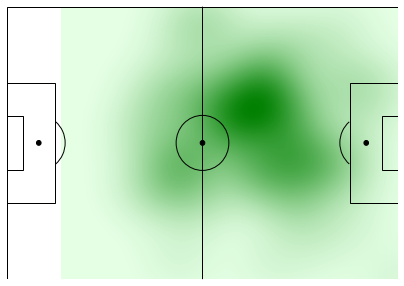

In [82]:
messi = barc_real[barc_real["playerId"] == 3359][["eventName", "playerId", "positions"]] #Messi
messi['start_location'] = messi.apply(lambda row: row.positions[0], axis=1)
messi['end_location'] = messi.apply(lambda row: row.positions[1], axis=1)

fig=plt.figure() #set up the figures
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax) #overlay our different objects on the pitch
plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.axis('off')
x_coord_messi = [x.get('x', 1)/100*120 for x in messi['start_location']]
y_coord_messi = [y.get('y', 0)/100*80 for y in messi["start_location"]]

#shades: give us the heat map we desire
# n_levels: draw more lines, the larger n, the more blurry it looks
sns.kdeplot(x_coord_messi, y_coord_messi, shade = "True", color = "green", n_levels = 200)
plt.ylim(0, 80) # need this, otherwise kde plot will go outside
plt.xlim(0, 120)
plt.show()


## Part 2

In [83]:
matches_jn = pd.read_json("C:/Users/Luca/Desktop/-/Università/Magistrale/Primo anno/Primo semestre/ADM/Homeworks/Homework #2/Data/matches/Secondary/matches_Italy.json")
matches_jn[matches_jn["label"] == "Juventus - Napoli, 0 - 1"] # matchID = 2576295

# events of Juve - Napoli, 0-1 on the 22nd of April 2018
events_italy = pd.read_json("C:/Users/Luca/Desktop/-/Università/Magistrale/Primo anno/Primo semestre/ADM/Homeworks/Homework #2/Data/events/Secondary/events_Italy.json")
juv_nap = events_italy[events_italy["matchId"] == 2576295] 

# We selected only the events we are interested in, such as: Passes
juv_nap = juv_nap[(juv_nap["eventName"] == "Pass")] 
juv_nap

findplayers = juv_nap.merge(players, left_on='playerId', right_on='wyId') 
findplayers.groupby("lastName", as_index=False).last() 
# Pjanic ---> id = 20443
# Jorginho ---> id = 21315

,lastName,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,...,currentTeamId,firstName,foot,height,middleName,passportArea,role,shortName,weight,wyId
0,Albiol Tortajada,8,Pass,2316.174283,245489091,2576295,2H,3300,"[{'y': 30, 'x': 35}, {'y': 62, 'x': 41}]",85,...,3187,Ra\u00fal,right,190,,"{'name': 'Spain', 'id': '724', 'alpha3code': '...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",Albiol,82,3300
1,Asamoah,8,Pass,2861.650887,245488976,2576295,2H,20588,"[{'y': 9, 'x': 28}, {'y': 63, 'x': 55}]",83,...,3159,Kwadwo,left,178,,"{'name': 'Ghana', 'id': '288', 'alpha3code': '...","{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",K. Asamoah,78,20588
2,Buffon,8,Pass,2849.362983,245488975,2576295,2H,20455,"[{'y': 45, 'x': 12}, {'y': 68, 'x': 64}]",84,...,3159,Gianluigi,right,191,,"{'name': 'Italy', 'id': '380', 'alpha3code': '...","{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...",G. Buffon,83,20455
3,Callej\u00f3n Bueno,8,Pass,2329.285304,245489096,2576295,2H,3313,"[{'y': 83, 'x': 67}, {'y': 92, 'x': 73}]",85,...,3187,Jos\u00e9 Mar\u00eda,right,178,,"{'name': 'Spain', 'id': '724', 'alpha3code': '...","{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...",Jos\u00e9 Callej\u00f3n,73,3313
4,Chiellini,8,Pass,523.052470,245487560,2576295,1H,20461,"[{'y': 18, 'x': 41}, {'y': 9, 'x': 57}]",85,...,3159,Giorgio,left,186,,"{'name': 'Italy', 'id': '380', 'alpha3code': '...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",G. Chiellini,76,20461
5,Costa de Souza,8,Pass,1205.024103,245488473,2576295,2H,105334,"[{'y': 43, 'x': 61}, {'y': 56, 'x': 65}]",85,...,3159,Douglas,left,170,,"{'name': 'Portugal', 'id': '620', 'alpha3code'...","{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",Douglas Costa,65,105334
6,Cuadrado Bello,8,Pass,2899.193081,245488983,2576295,2H,20751,"[{'y': 97, 'x': 72}, {'y': 49, 'x': 85}]",80,...,3159,Juan Guillermo,right,179,,"{'name': 'Colombia', 'id': '170', 'alpha3code'...","{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",J. Cuadrado,71,20751
7,El Mouttaqi Benatia,8,Pass,2837.686076,245488972,2576295,2H,20579,"[{'y': 33, 'x': 28}, {'y': 30, 'x': 52}]",82,...,3159,Medhi Amine,right,190,,"{'name': 'Morocco', 'id': '504', 'alpha3code':...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",M. Benatia,92,20579
8,Exequiel Dybala,8,Pass,2386.226848,245488006,2576295,1H,89186,"[{'y': 44, 'x': 65}, {'y': 8, 'x': 71}]",85,...,3159,Paulo Bruno,left,177,,"{'name': 'Poland', 'id': '616', 'alpha3code': ...","{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...",P. Dybala,69,89186
9,Frello Filho,8,Pass,2608.096907,245489158,2576295,2H,21315,"[{'y': 45, 'x': 67}, {'y': 11, 'x': 80}]",83,...,3187,Jorge Luiz,right,180,,"{'name': 'Italy', 'id': '380', 'alpha3code': '...","{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",Jorginho,65,21315


### Let's create the field with arrows and heatmap



#### Pjanic

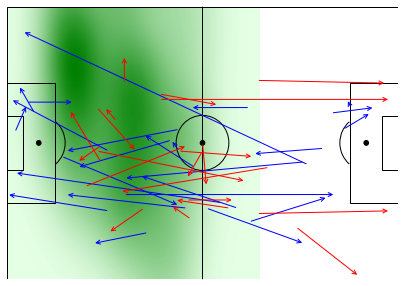

In [84]:
pj_pass = juv_nap[juv_nap["playerId"] == 20443][["eventName", "playerId", "positions", "tags", "matchPeriod"]] #Pjanic
pj_pass['start_location'] = pj_pass.apply(lambda row: row.positions[0], axis=1)
pj_pass['end_location'] = pj_pass.apply(lambda row: row.positions[1], axis=1)
pj_pass

fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax)
plt.axis('off')
x_cord_pj_end = [x.get('x', 1)/100*80 for x in pj_pass['end_location']]
y_cord_pj_end = [y.get('y', 0)/100*120 for y in pj_pass["end_location"]]
x_coord_pj = [x.get('x', 1)/100*80 for x in pj_pass['start_location']]
y_coord_pj = [y.get('y', 0)/100*120 for y in pj_pass["start_location"]]
for i in range(len(pj_pass)):
    # can also differentiate by color
    c = "blue" if pj_pass.iloc[i]['matchPeriod'] == "1H" else "red"
    ax.annotate("", xy = (y_cord_pj_end[i], x_cord_pj_end[i]), xycoords = 'data',
               xytext = (y_coord_pj[i], x_coord_pj[i]), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = c),)
sns.kdeplot(x_coord_pj, y_coord_pj, shade = "True", color = "green", n_levels = 200)
plt.ylim(0, 80) # need this, otherwise kde plot will go outside
plt.xlim(0, 120)
plt.show()

#### Jorginho

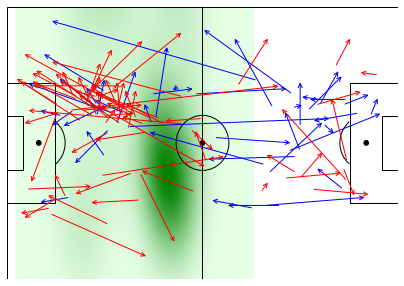

In [85]:
jo_pass = juv_nap[juv_nap["playerId"] == 21315][["eventName", "playerId", "positions", "tags", "matchPeriod"]] #Jorginho
jo_pass['start_location'] = jo_pass.apply(lambda row: row.positions[0], axis=1)
jo_pass['end_location'] = jo_pass.apply(lambda row: row.positions[1], axis=1)
jo_pass

fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax)
plt.axis('off')
x_cord_jo_end = [x.get('x', 1)/100*80 for x in jo_pass['end_location']]
y_cord_jo_end = [y.get('y', 0)/100*120 for y in jo_pass["end_location"]]
x_coord_jo = [x.get('x', 1)/100*80 for x in jo_pass['start_location']]
y_coord_jo = [y.get('y', 0)/100*120 for y in jo_pass["start_location"]]
for i in range(len(jo_pass)):
    # can also differentiate by color
    c = "blue" if jo_pass.iloc[i]['matchPeriod'] == "1H" else "red"
    ax.annotate("", xy = (y_cord_jo_end[i], x_cord_jo_end[i]), xycoords = 'data',
               xytext = (y_coord_jo[i], x_coord_jo[i]), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = c),)
sns.kdeplot(x_coord_jo, y_coord_jo, shade = "True", color = "green", n_levels = 200)
plt.ylim(0, 80) # need this, otherwise kde plot will go outside
plt.xlim(0, 120)
plt.show()